In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pickle

In [ ]:
n = 10 #number of subjects

notfound = {}
start = []
end = []

for i in range(n):
    try:
            events = pd.read_csv(f"events/sub-{(i+1):04d}/func/sub-{(i+1):04d}_task-faces_acq-mb3_events.tsv",sep='\t',header=0)
    
    except FileNotFoundError:
        
            notfound[i] = f"{(i+1):04d}"
            continue
    
    start.append(np.array(events.onset*4/3))
    end.append(np.array((events.onset+2)*4/3))

print(f"files not found {[*notfound.values()]}")
print(f"Number of files not found: {len(notfound)}")
print(f"Number of subjects {len(start)}")

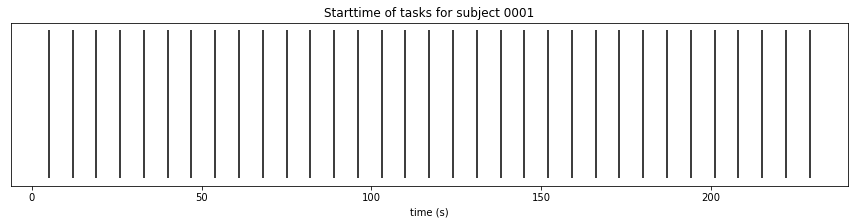

In [7]:
plt.figure(figsize=(15,3))
plt.yticks([])
plt.title("Starttime of tasks for subject 0001")
plt.xlabel("time (s)")
plt.vlines(start[0]*3/4, 0, 1, linestyles ="solid", colors ="k")

In [8]:
N = len(start)
Labels = np.zeros([N,330])

for i in range(N):
    for j in range(len(start[i])):
        
        idx = math.ceil(start[i][j])
        
        while idx < end[i][j]:
            Labels[i,idx] = 1
            idx += 1

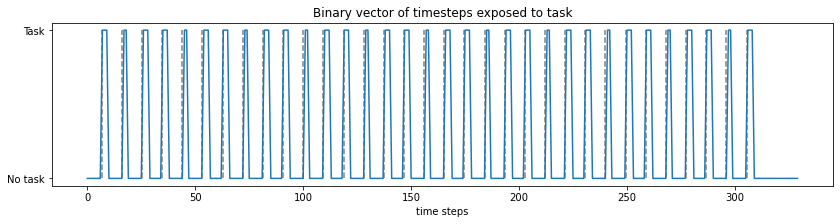

In [9]:
plt.figure(figsize=(14,3))
plt.plot(Labels[0])
plt.yticks([0,1],["No task","Task"])
plt.title("Binary vector of timesteps exposed to task")
plt.xlabel("time steps")
plt.vlines(start[0], 0, 1, linestyles ="dashed", colors ="gray")

In [10]:
print((len(start[0])*2*4/3)/330)
print(np.mean(Labels[0]))

0.26666666666666666
0.26666666666666666


In [11]:
import hrf_estimation as he
print('You are running hrf_estimation version %s' % he.__version__)

You are running hrf_estimation version 1.1


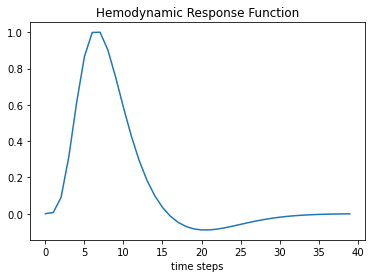

In [12]:
from scipy import signal

xx = np.linspace(0, 30,num=int(30*4/3))
hrf = he.hrf.spmt(xx)
plt.plot(hrf)
plt.xlabel("time steps")
plt.title("Hemodynamic Response Function")


LabelsC = [np.convolve(Labels[i],hrf, mode = "full")[0:330] for i in range(Labels.shape[0])]

LabelsC = np.array([(LabelsC[i] - LabelsC[i].mean())/(LabelsC[i].max())+1/2 for i in range(Labels.shape[0])])

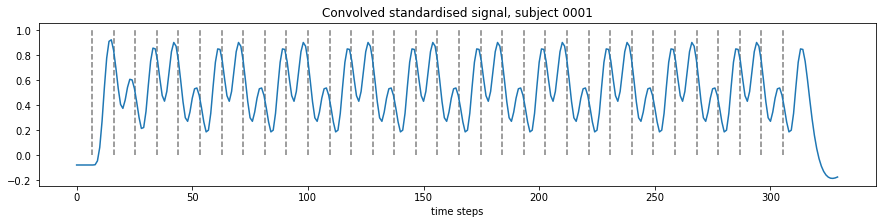

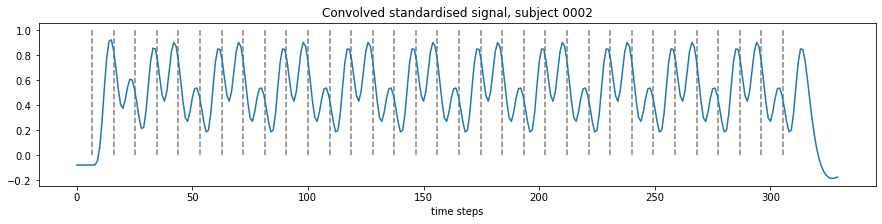

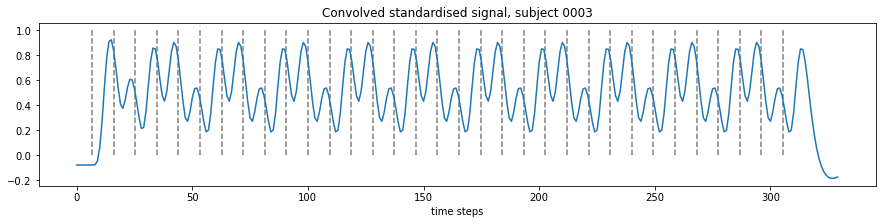

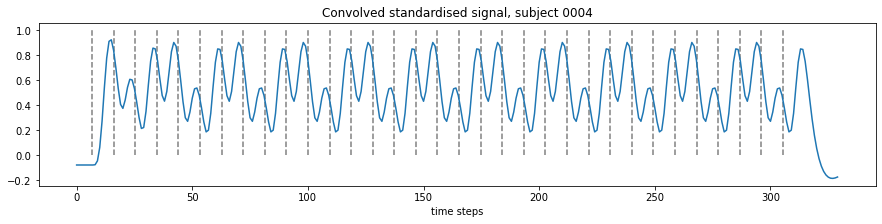

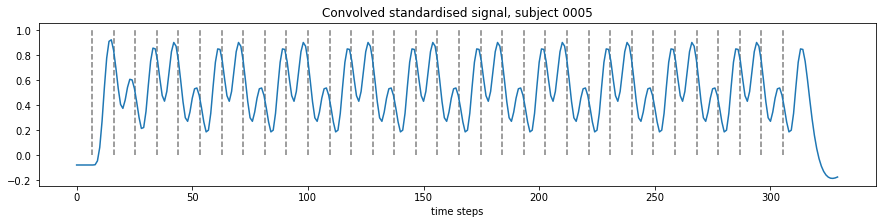

In [13]:
for i in range(5):
    plt.figure(figsize=(15,3))
    plt.plot(LabelsC[i][0:330])
    plt.title(f"Convolved standardised signal, subject {(i+1):04d}")
    plt.xlabel("time steps")
    plt.vlines(start[i], 0, 1, linestyles ="dashed", colors ="gray")
    plt.show()

In [19]:
print(LabelsC.shape)
y = np.array(LabelsC).flatten()

(10, 330)


In [20]:
#export to R
pd.DataFrame(y).to_csv('y_K=10.csv')